<a href="https://colab.research.google.com/github/Shakil97/ActionBar/blob/master/phish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install eli5==0.0.5

In [ ]:
import pandas as pd
import numpy as np
import random
import sys
import os
!pip install tldextract -q
import tldextract
import warnings
import regex as re
import eli5
from typing import *

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
import seaborn as sns 
from urllib.parse import urlparse
from nltk.tokenize import RegexpTokenizer

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('phishingDataset.csv')
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [ ]:
data.shape

(11430, 65)

In [ ]:
#Encoding 'status' as label 1 & 0 , naming the field as Label
data['label'] = pd.get_dummies(data['status'])['legitimate'].astype('int')
data.drop('status',axis = 1, inplace=True)
data[['url','label']].head(5)

,url,label
0,http://www.crestonwood.com/router.php,1
1,http://shadetreetechnology.com/V4/validation/a...,0
2,https://support-appleld.com.secureupdate.duila...,0
3,http://rgipt.ac.in,1
4,http://www.iracing.com/tracks/gateway-motorspo...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_percent                  11430 non-null  int64  
 12  nb_slash                    11430 non-null  int64  
 13  nb_colon                    114

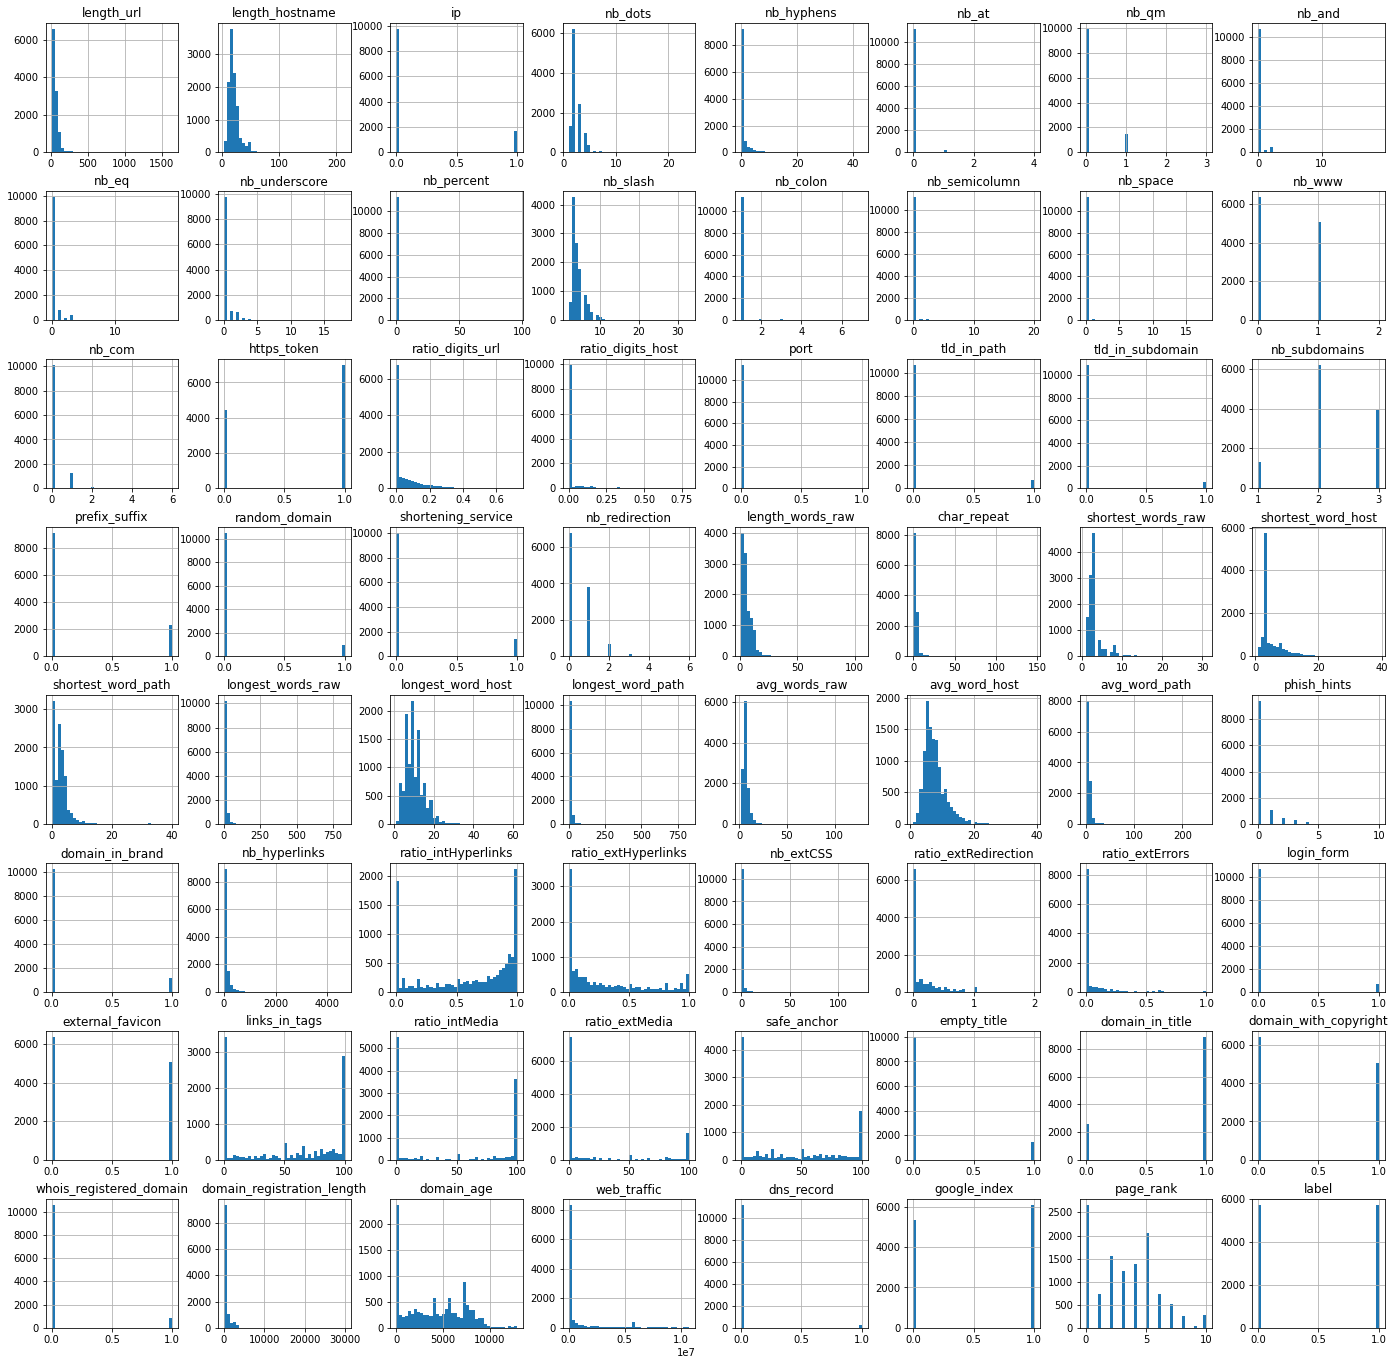

In [ ]:
data.hist(bins = 40,figsize = (24,24))
plt.show()

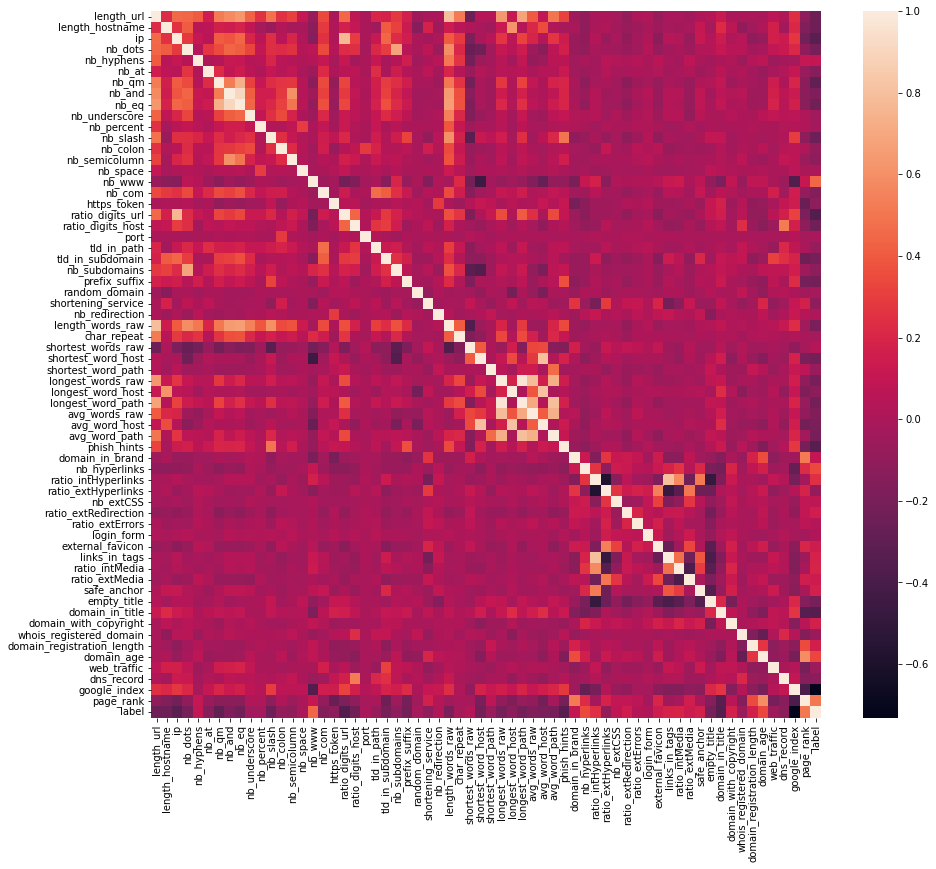

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

In [ ]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,label
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.293176,0.322660,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.998317,1.093336,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,19.000000,18.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [ ]:
#Dropping the Domain column
data1 = data.drop(['url'], axis = 1).copy()

In [ ]:
#checking the data for null or missing values
data1.isnull().sum()

length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
label              0
Length: 64, dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data1 = data1.sample(frac=1).reset_index(drop=True)
data1.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,label
0,82,16,0,2,0,0,1,0,1,2,...,0,0,0,2973,8348,1,0,1,10,0
1,29,11,0,1,0,0,0,0,0,0,...,1,0,0,180,7491,63,0,0,10,1
2,48,16,0,2,0,0,0,0,0,0,...,1,1,0,315,2241,0,0,1,0,0
3,39,25,0,2,0,0,0,0,0,0,...,0,0,0,122,1338,22211,0,1,6,0
4,77,22,1,1,0,0,1,1,1,0,...,1,0,0,3149,3426,6045690,0,1,1,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data1['label']
X = data1.drop('label',axis=1)
X.shape, y.shape

((11430, 63), (11430,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((9144, 63), (2286, 63))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [88]:
from pandas.core.common import random_state
from sklearn import naive_bayes
from sklearn.preprocessing import MinMaxScaler
# Decision Tree model 
from sklearn.naive_bayes import MultinomialNB

# instantiate the model 
naive_bayes = MultinomialNB()
# fit the model 
#naive_bayes.fit(X_train, y_train)

naive_bayes = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
naive_bayes.fit(X_train,y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [89]:
#predicting the target value from the model for the samples
y_test_naive = naive_bayes.predict(X_test)
y_train_naive = naive_bayes.predict(X_train)

In [91]:
#computing the accuracy of the model performance
acc_train_naive = accuracy_score(y_train,y_train_naive)
acc_test_naive = accuracy_score(y_test,y_test_naive)

print("Naive bayes: Accuracy on training Data: {:.3f}".format(acc_train_naive))
print("Naive bayes: Accuracy on test Data: {:.3f}".format(acc_test_naive))

Naive bayes: Accuracy on training Data: 0.883
Naive bayes: Accuracy on test Data: 0.885


In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,14))
n_features = X_train.shape[1]
plt.barh(range(n_features), naive_bayes.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [93]:
storeResults('Naive_bayes', acc_train_naive, acc_test_naive)

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.940
Decision Tree: Accuracy on test Data: 0.931


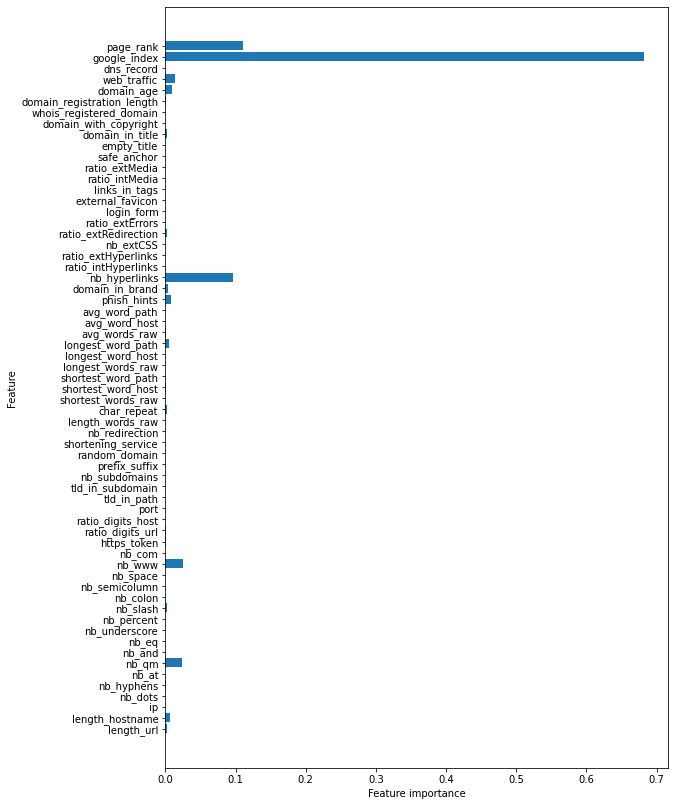

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,14))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
# Random Forest model
#from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.948
Random forest: Accuracy on test Data: 0.941


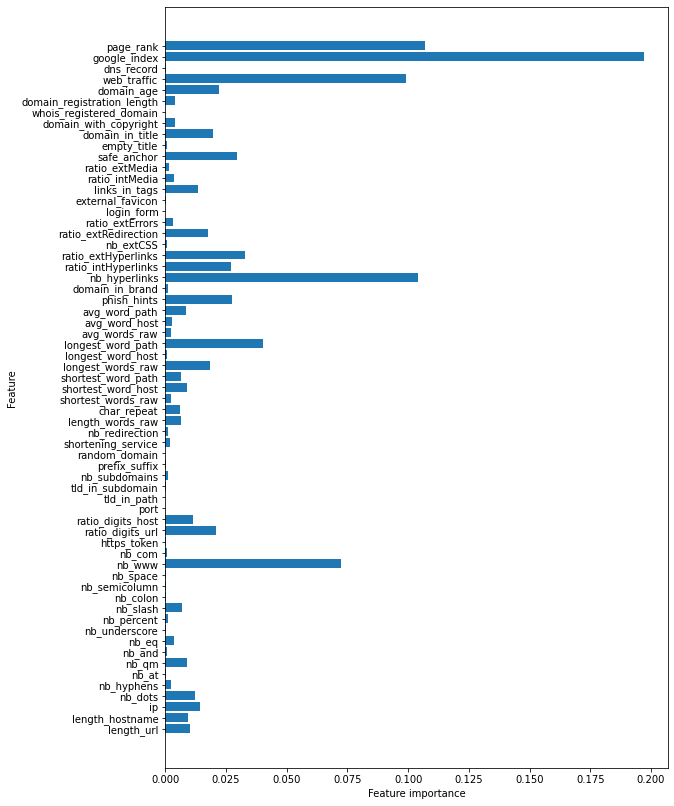

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,14))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [80]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=10)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=10)

In [81]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [82]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 0.966


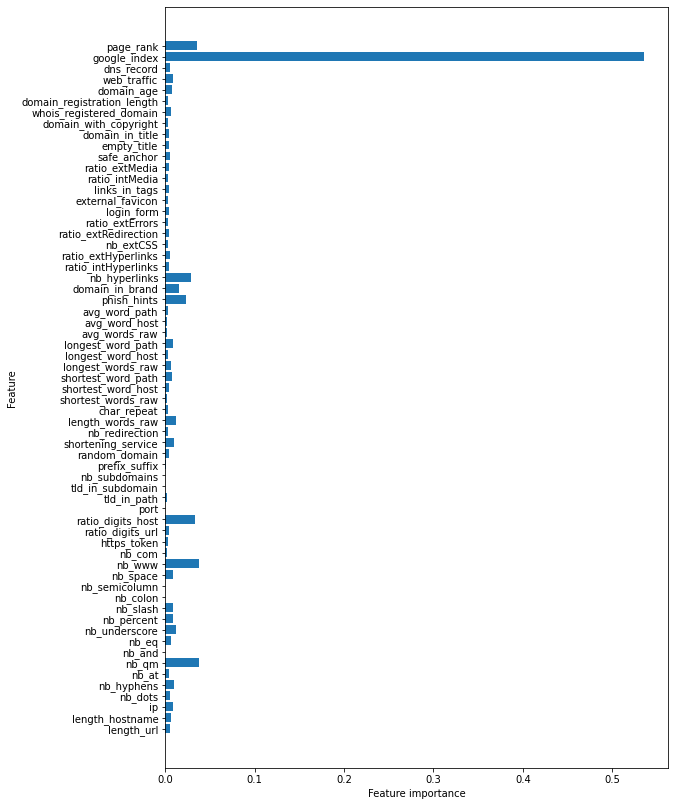

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,14))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [67]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [69]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [70]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.685
SVM : Accuracy on test Data: 0.675


In [72]:
#checking the feature improtance in the model
plt.figure(figsize=(9,14))
n_features = X_train.shape[1]
plt.barh(range(n_features), svm.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

AttributeError: ignored

<Figure size 648x1008 with 0 Axes>

In [73]:
storeResults('SVM', acc_train_svm, acc_test_svm)

In [94]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.940,0.931
1,Random Forest,0.948,0.941
2,XGBoost,1.000,0.965
3,SVM,0.685,0.675
4,SVM,0.685,0.675
5,Naive_bayes,0.883,0.885


In [95]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,1.000,0.965
1,Random Forest,0.948,0.941
0,Decision Tree,0.940,0.931
5,Naive_bayes,0.883,0.885
3,SVM,0.685,0.675
4,SVM,0.685,0.675


In [96]:
def results(name: str, model: BaseEstimator) -> None:
    preds = model.predict(X_test)

    print(name + " score: %.3f" % model.score(X_test, y_test))
    print(classification_report(y_test, preds))
    labels = ['Good', 'Bad']

    conf_matrix = confusion_matrix(y_test, preds)

    font = {'family' : 'normal',
            'size'   : 14}

    plt.rc('font', **font)
    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap='Blues')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

Decision Tree score: 0.931
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1107
           1       0.93      0.94      0.93      1179

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

Random forest score: 0.941
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1107
           1       0.94      0.94      0.94      1179

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286

Naive bayes score: 0.885
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1107
           1       0.88      0.90      0.89      1179

    accuracy                           0.88      2286
   macro avg       0.89      0.88      0.88      

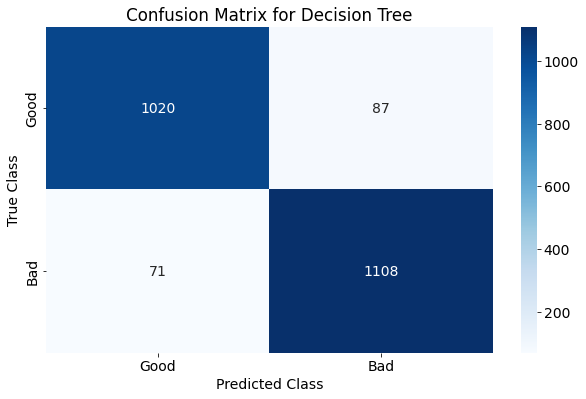

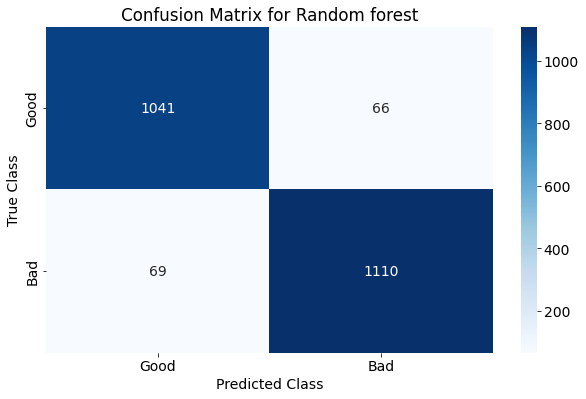

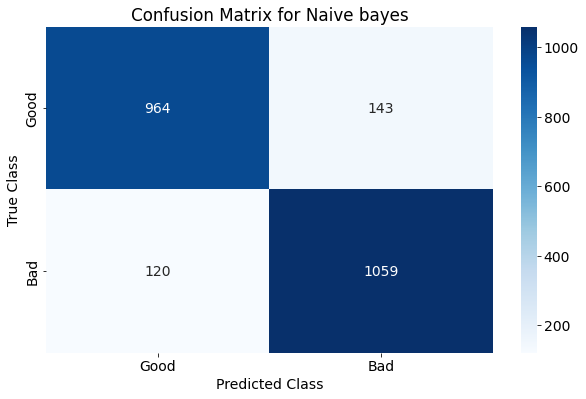

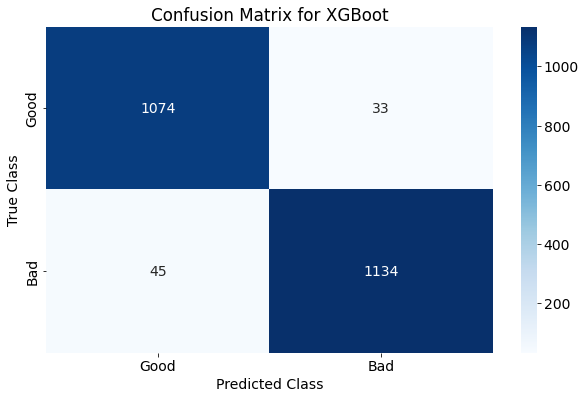

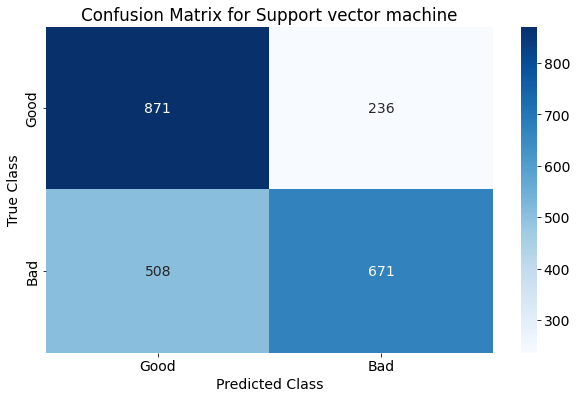

In [97]:
results("Decision Tree" , tree)
results("Random forest" , forest)
results("Naive bayes", naive_bayes)
results("XGBoot" , xgb)
results("Support vector machine", svm)


In [76]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [77]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)